Импортируем Pandas и Numpy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Качаем датасет с Kaggle

In [2]:
df = pd.read_csv('./titanic/train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Обработаем пустые значения 

In [5]:
df = df.dropna(subset=['Age'])

In [6]:
df= df.fillna(method='ffill')

Т.к. столбец 'Cabin' в основном не заполнен - удалим его

In [7]:
df = df.drop(['Cabin'], axis=1)

Строим матрицу корреляции

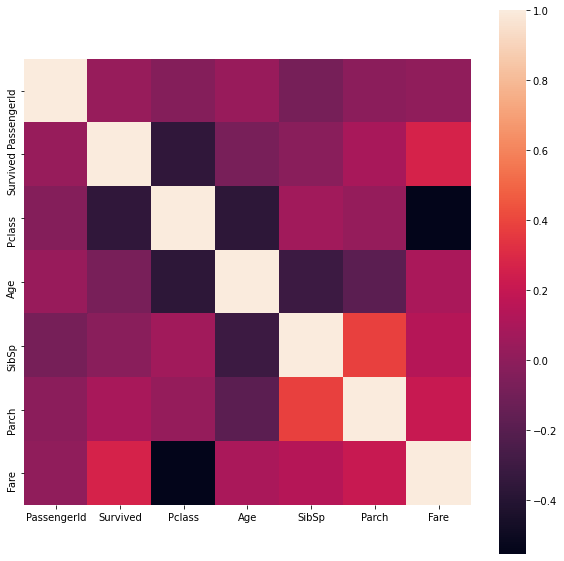

In [8]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), square=True)
plt.show()

Т.к. столбцов с коэффициентом корреляции близким к 1 в датасете нет - удалять коррелирующие столбцы не нужно

Построим зависимость кол-ва выживших от различных признаков

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

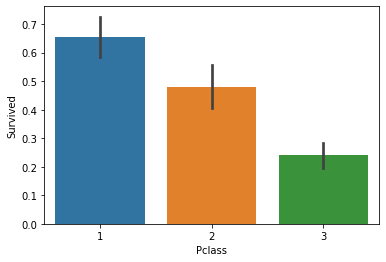

In [9]:
# Доля выживших в зависимости от класса салона
sns.barplot(data=df, x='Pclass', y='Survived')

#### Процент выживших прямо зависит от класса обслуживания. Скорее всего это связано с наличием спасательных средств, меньшей скученностью и возможностями для эвакуации пассажиров.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

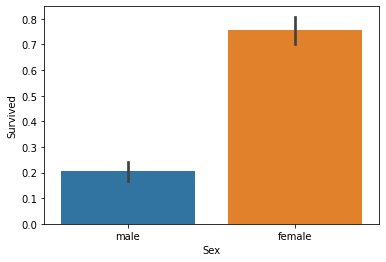

In [10]:
# Доля выживших в зависимости от пола
sns.barplot(data=df, x='Sex', y='Survived')

#### Процент выживших женщин более чем в три раза выше чем мужчин. Вероятно, женщинам предоставляли преимущества при эвакуации. 

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

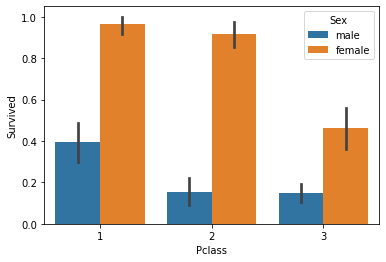

In [11]:
# Доля выживших в зависимости от пола по классам
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')

#### Распределение выживших женщин по классам в целом аналогично. 
Даже в третьем классе, где вероятность погибнуть была выше - женщинам предоставлялись преимущества при посадке. 

Сгруппируем пассажиров по возрасту на группы кратные 20 годам

In [24]:
age_category = lambda x: x // 10 * 10 + 10
df['age_category']= age_category(df.Age)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,30.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,40.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,30.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,40.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,40.0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,30.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,20.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,30.0


<AxesSubplot:xlabel='age_category', ylabel='Survived'>

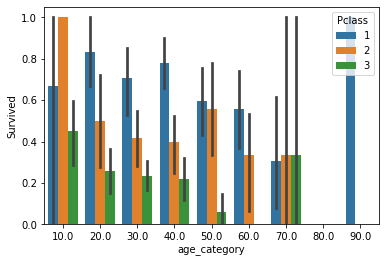

In [25]:
# Доля выживших в зависимости от возрастной категории по классам
sns.barplot(data=df, x='age_category', y='Survived', hue='Pclass')

#### Значительная часть взрослых мужчин погибла (в третьем классе погибли почти все мужчины в возрасте от 40 до 60 лет). Видимо, при посадке взрослые мужчины вне зависимости от возраста и состояния здоровья по собственной инициативе или вследствие действий организаторов посадки уступали свои посадочные средства женщинам и детям.

SibSp - наличие родственников на борту

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

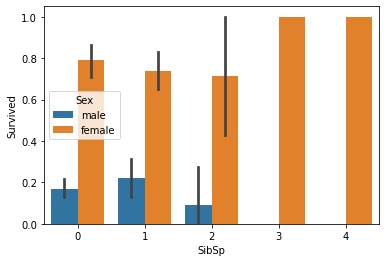

In [27]:
# Доля выживших взрослых в зависимости от наличия родственников по полам
sns.barplot(data=df[df['Age']>16], x='SibSp', y='Survived', hue='Sex')

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

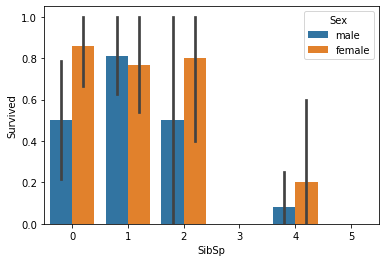

In [29]:
# Доля выживших детей в зависимости от наличия родственников по полам
sns.barplot(data=df[df['Age']<=16], x='SibSp', y='Survived', hue='Sex')

#### Значительная часть взрослых мужчин при наличии родственников (жещин, детей погибла). Для женщин, наоборот при наличии 2 и более детей шансы уцелеть были выше. Для детей при наличии 1 родственника (мать) шансы уцелеть были примерно одинаковы вне зависимости от пола. Но если родственников не были или было 2 и более (мать и сестра), то мальчики погибали чаще.

    Embarked - порт посадки пассажира

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

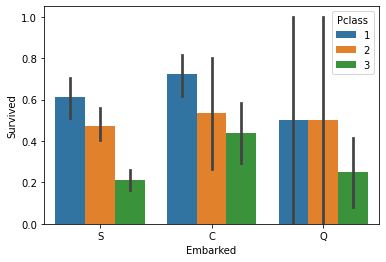

In [30]:
# Доля выживших в зависимости порта посадки
sns.barplot(data=df, x='Embarked', y='Survived', hue='Pclass')

#### Доля спасшихся пассажиров больше среди людей, которые сели на борт в Шербурге (Cherbourg)